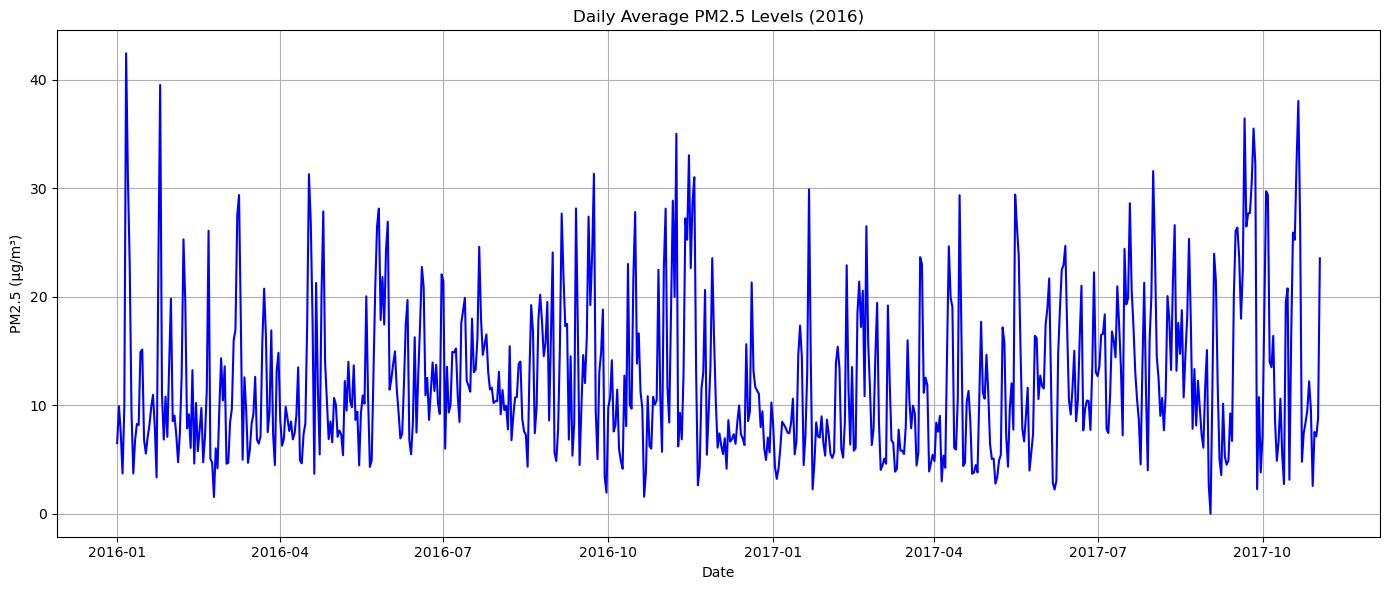

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

"""
Analyzes air quality data specifically focusing on PM2.5 pollutant levels.

Steps performed:
- Loads air quality data from a CSV file.
- Converts timestamps to datetime format for accurate temporal analysis.
- Filters data for valid pollutant readings and selects PM2.5 among key pollutants (PM2.5, O3, NO2, SO2).
- Computes daily average PM2.5 values.
- Generates a time-series plot visualizing daily average PM2.5 concentrations throughout 2016

"""


df = pd.read_csv("C:/Users/hp/aq_2016_full.csv")

df['datetime_est'] = pd.to_datetime(df['datetime_est'])

df_valid = df[df['is_valid'] == 't'].copy()

pollutants = ['PM25', 'O3', 'NO2', 'SO2']
df_pollutants = df_valid[df_valid['parameter'].isin(pollutants)].copy()

df_pollutants['date'] = df_pollutants['datetime_est'].dt.date
df_pollutants['month'] = df_pollutants['datetime_est'].dt.to_period('M')
df_pollutants['season'] = df_pollutants['datetime_est'].dt.month % 12 // 3 + 1
df_pollutants['season'] = df_pollutants['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

pm25_daily = df_pollutants[df_pollutants['parameter'] == 'PM25'].groupby('date')['report_value'].mean()

plt.figure(figsize=(14, 6))
plt.plot(pm25_daily.index, pm25_daily.values, label='PM2.5', color='blue')
plt.title("Daily Average PM2.5 Levels (2016)")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
"""
Performs exploratory data analysis (EDA) on air quality pollutant data.

Operations include:
- Displaying first few rows to preview data structure.
- Computing descriptive statistics for pollutant measurement values.
- Counting occurrences of pollutant readings by monitoring sites and pollutant type.
- Calculating mean pollutant values by monitoring
"""

df_pollutants.head()

df_pollutants.describe()

df_pollutants['site'].value_counts()

df_pollutants['parameter'].value_counts()

df_pollutants.groupby(['site', 'parameter'])['report_value'].mean().unstack()

df_pollutants.groupby(['season', 'parameter'])['report_value'].mean().unstack()

df_pollutants.isnull().sum()


_id                            0
datetime_est                   0
site                           0
parameter                      0
is_valid                       0
report_value                   0
unit                           0
unit_description               0
highest_flag              133724
aqs_parameter_category         0
date                           0
month                          0
season                         0
dtype: int64

In [9]:
df_pollutants.head()

,_id,datetime_est,site,parameter,is_valid,report_value,unit,unit_description,highest_flag,aqs_parameter_category,date,month,season
0,1,2016-01-01,Lincoln,PM25,t,3.000,UG/M3,micrograms per cubic meter,NaN,Particulate,2016-01-01,2016-01,Winter
2,3,2016-01-01,Liberty,SO2,t,0.001,PPM,Parts Per Million,C,Criteria Pollutants,2016-01-01,2016-01,Winter
13,14,2016-01-01,Lawrenceville 2,SO2,t,0.000,PPB,Parts Per Billion,NaN,Criteria Pollutants,2016-01-01,2016-01,Winter
23,24,2016-01-01,North Braddock,SO2,t,0.000,PPM,Parts Per Million,C,Criteria Pollutants,2016-01-01,2016-01,Winter
31,32,2016-01-01,Liberty 2,PM25,t,2.000,UG/M3,micrograms per cubic meter,NaN,Particulate,2016-01-01,2016-01,Winter


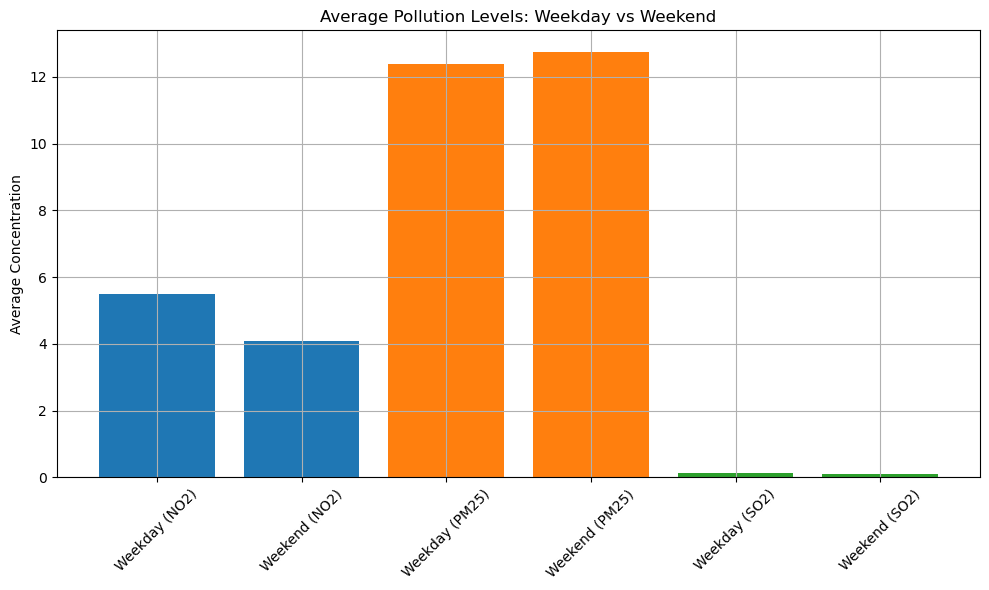

In [21]:
"""
Analyzes air pollutant levels, comparing average concentrations on weekdays versus weekends.

- Extracts day of the week from timestamp data, categorizing each day as 'Weekday' or 'Weekend'.
- Computes average pollutant concentrations separately for weekdays and weekends.
- Creates a comparative bar chart visualization showing differences in average pollutant levels between weekdays and weekends for each pollutant.
- Utilizes pandas datetime operations for temporal categorization.
- Calculates mean pollutant concentration grouped by day type (weekday/weekend) and pollutant type.
- Uses matplotlib to generate a grouped bar plot for easy visual comparison.

"""


df_pollutants['day_of_week'] = df_pollutants['datetime_est'].dt.dayofweek
df_pollutants['day_type'] = np.where(df_pollutants['day_of_week'] >= 5, 'Weekend', 'Weekday')

daytype_avg = df_pollutants.groupby(['day_type', 'parameter'])['report_value'].mean().reset_index()

plt.figure(figsize=(10, 6))
for pollutant in daytype_avg['parameter'].unique():
    data = daytype_avg[daytype_avg['parameter'] == pollutant]
    plt.bar(data['day_type'] + f" ({pollutant})", data['report_value'], label=pollutant)

plt.title('Average Pollution Levels: Weekday vs Weekend')
plt.ylabel('Average Concentration')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


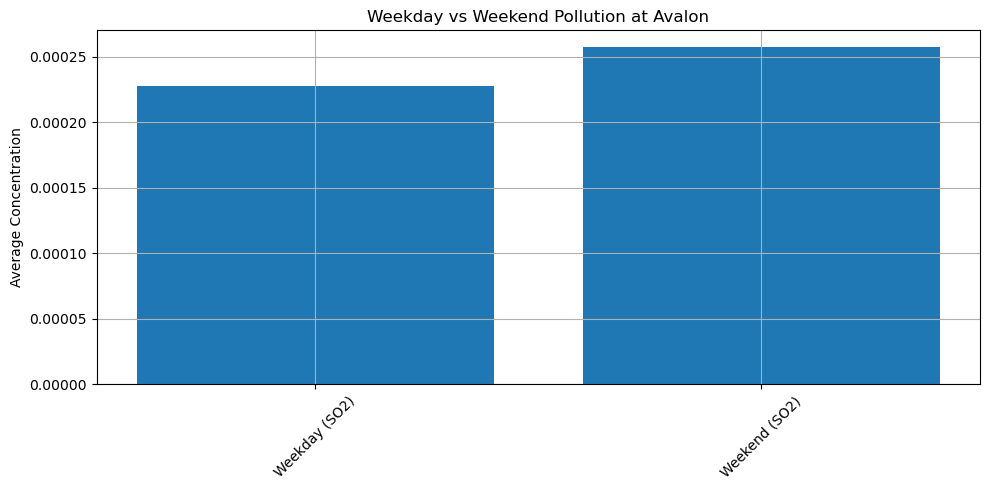

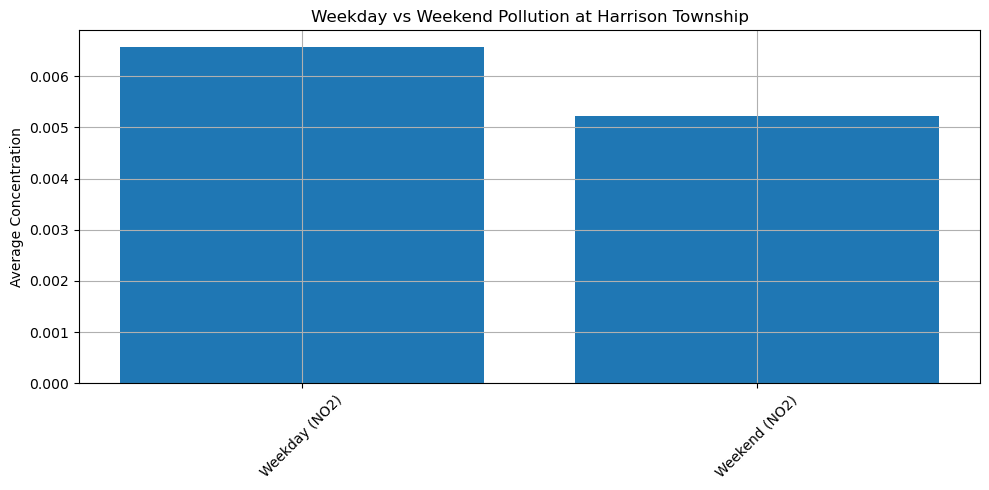

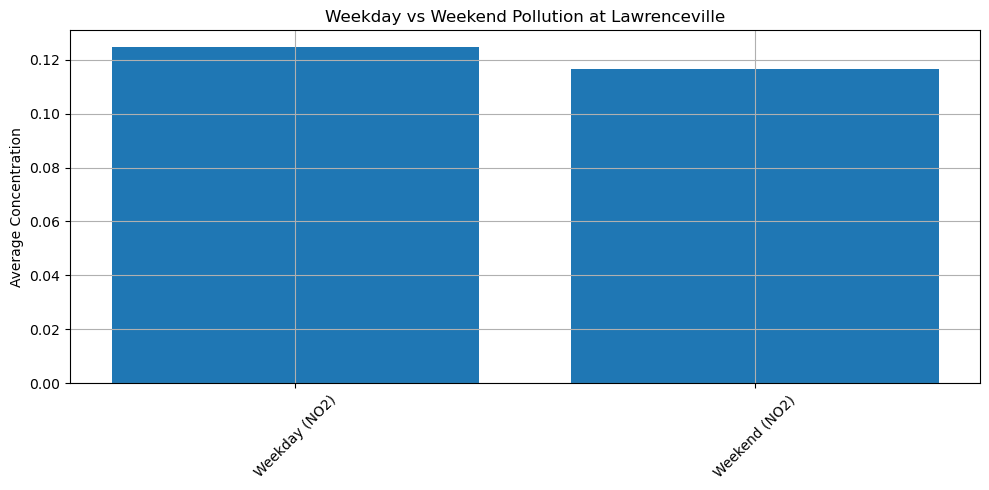

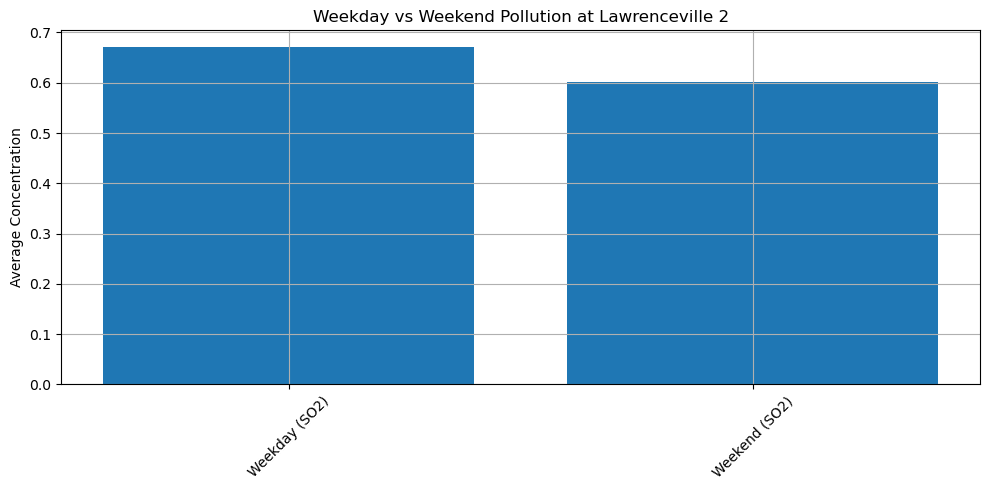

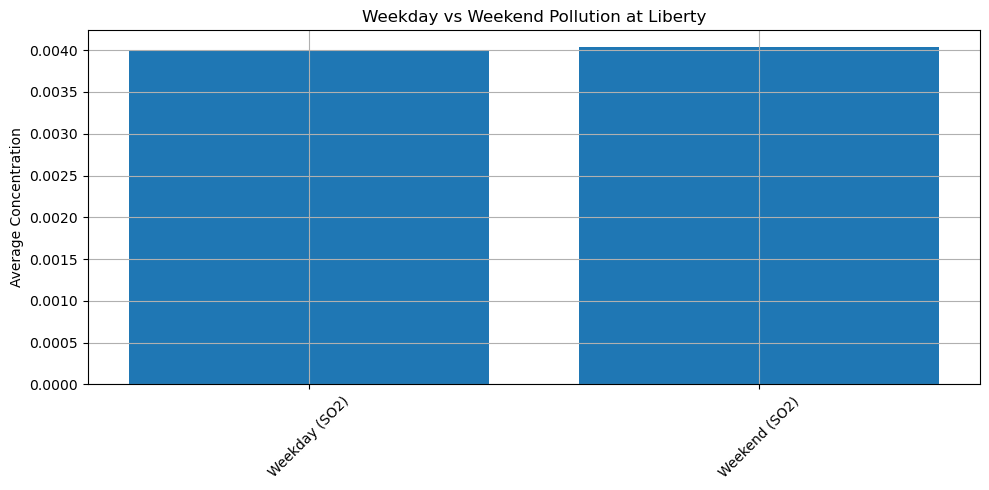

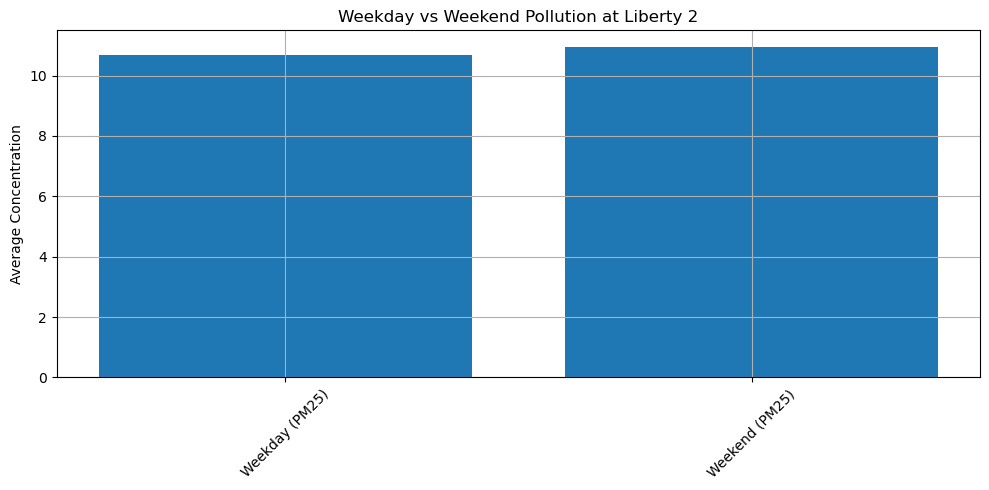

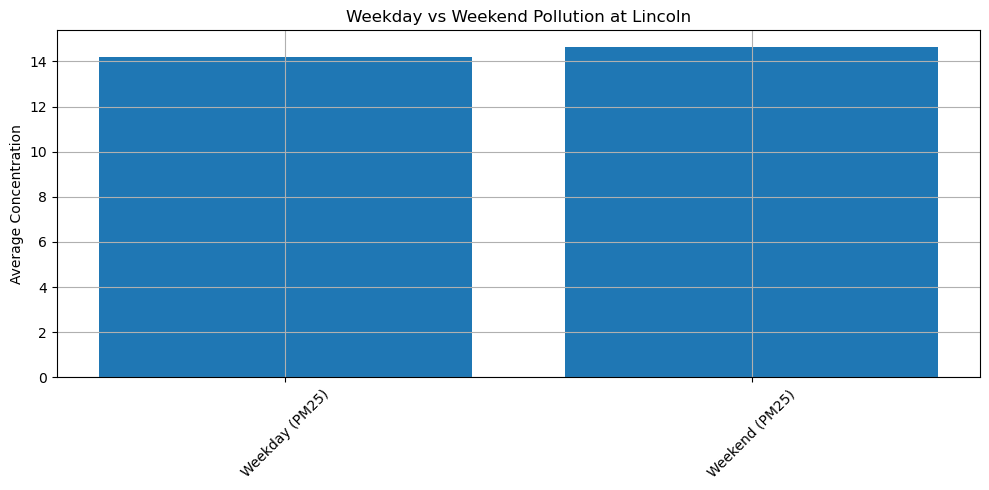

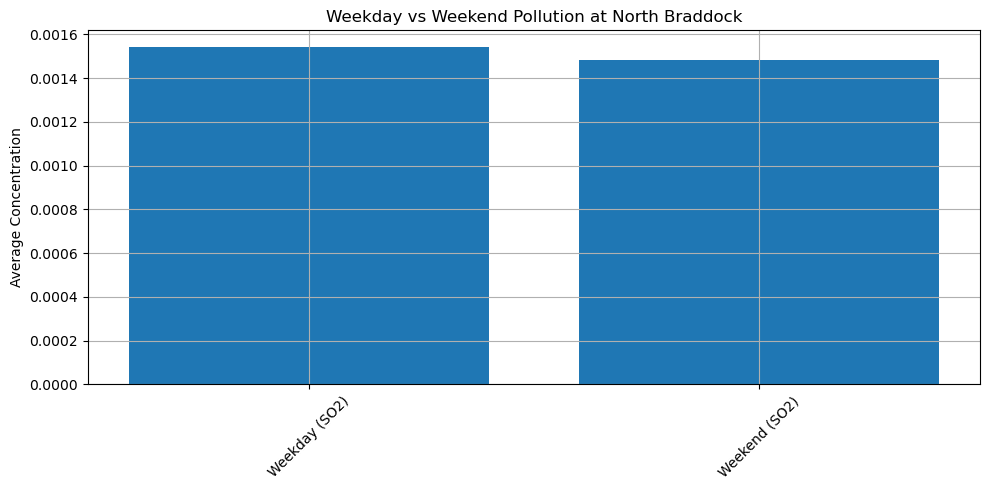

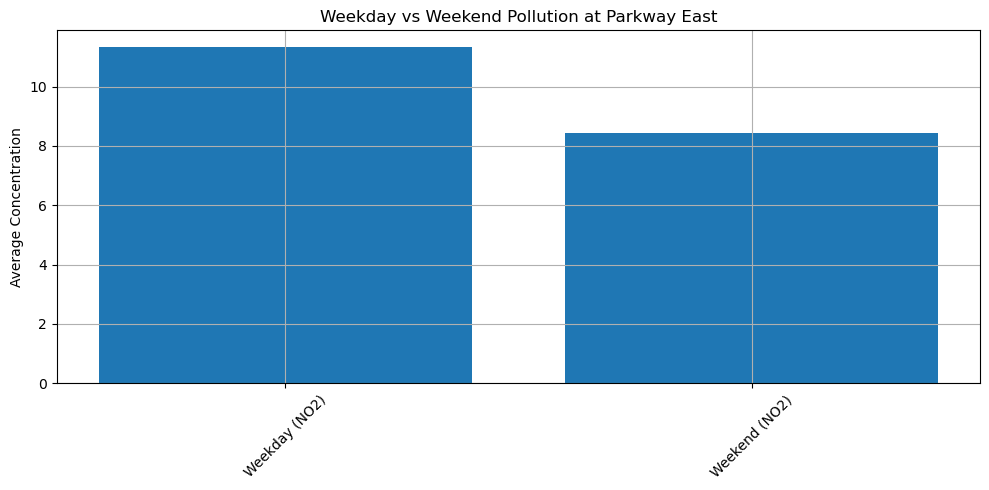

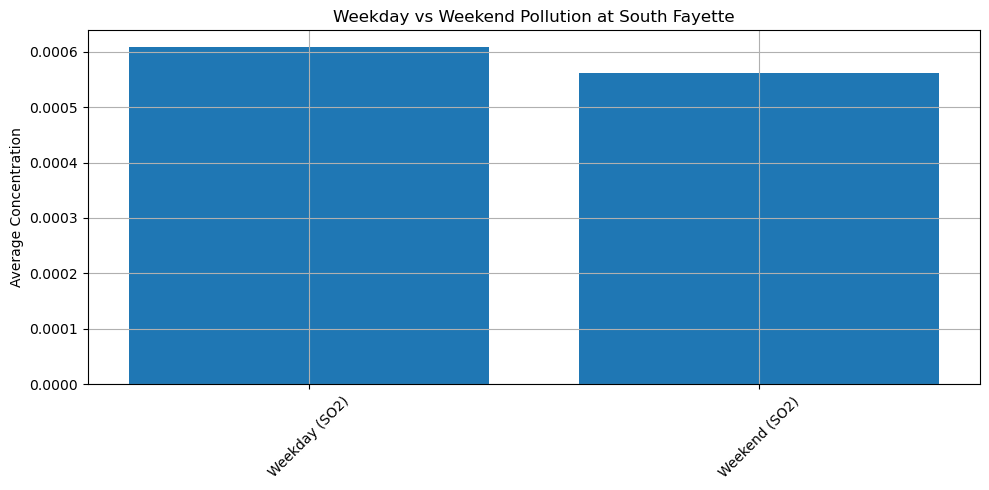

In [23]:
"""
Analyzes and visualizes average pollutant concentrations at different monitoring sites, comparing weekday versus weekend levels.

- Determines the day of the week from timestamp data and categorizes each record as 'Weekday' or 'Weekend'.
- Calculates mean pollutant concentrations grouped by monitoring site, day type (weekday/weekend), and pollutant type.
- Iteratively generates grouped bar plots for each monitoring site to compare average pollutant concentrations between weekdays and weekends.
- Groups data by three dimensions: monitoring site, day type, and pollutant.
- Produces individual plots for each monitoring site, clearly illustrating differences in pollutant levels across weekdays and weekends.
- Facilitates comparative analysis of pollution trends across sites.

"""


df_pollutants['day_of_week'] = df_pollutants['datetime_est'].dt.dayofweek
df_pollutants['day_type'] = np.where(df_pollutants['day_of_week'] >= 5, 'Weekend', 'Weekday')

site_daytype_avg = df_pollutants.groupby(['site', 'day_type', 'parameter'])['report_value'].mean().reset_index()

sites_to_plot = site_daytype_avg['site'].unique()

for site in sites_to_plot:
    data = site_daytype_avg[site_daytype_avg['site'] == site]
    if not data.empty:
        plt.figure(figsize=(10, 5))
        for pollutant in data['parameter'].unique():
            subset = data[data['parameter'] == pollutant]
            plt.bar(subset['day_type'] + f" ({pollutant})", subset['report_value'], label=pollutant)
        plt.title(f'Weekday vs Weekend Pollution at {site}')
        plt.ylabel('Average Concentration')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


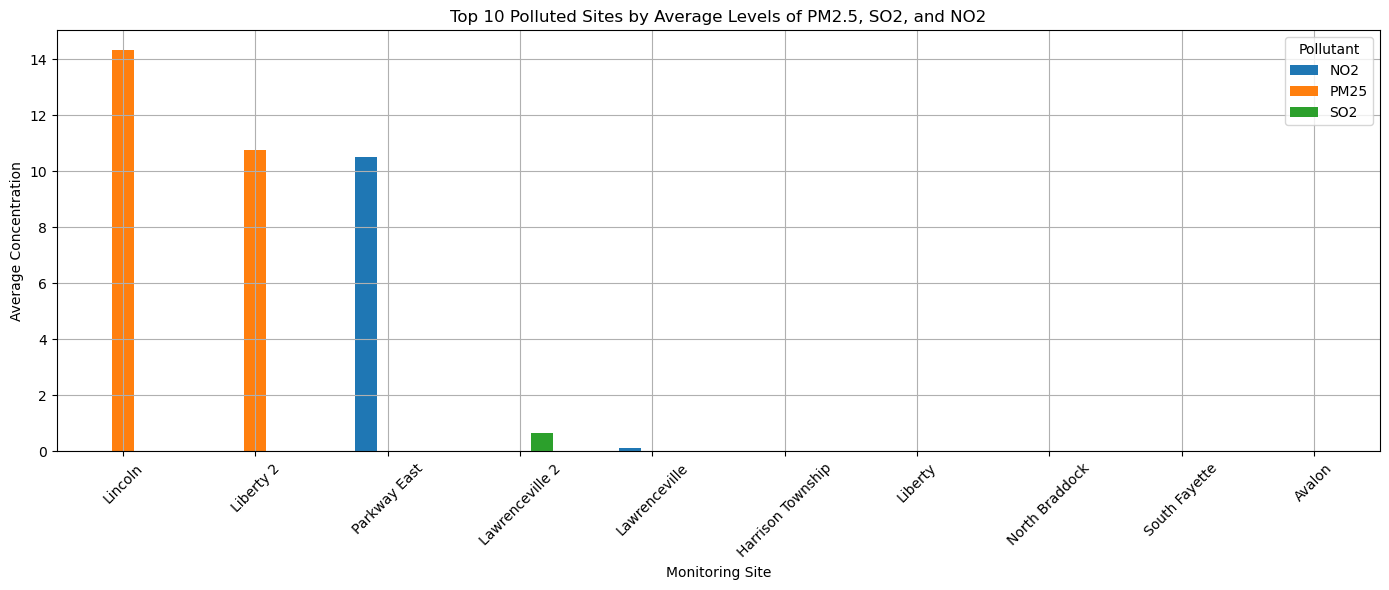

In [27]:
"""
Identifies and visualizes the top 10 most polluted monitoring sites based on average pollutant concentrations.

- Calculates average concentrations of each pollutant (PM2.5, SO2, NO2) by monitoring site.
- Reshapes data into a pivot table format for clarity and ease of analysis.
- Computes an aggregate score (total average pollutant concentration) per site to rank pollution severity.
- Selects and visualizes the 10 sites with the highest total average pollution levels.
- Uses pandas' pivot functionality to transform grouped averages into a site-by-pollutant matrix.
- Removes sites with no available pollutant data.
- Sorts sites in descending order of combined pollutant concentrations to identify the most impacted locations.
- Creates a bar plot showing average pollutant levels for the top 10 polluted sites for intuitive comparison.


"""


location_avg = df_pollutants.groupby(['site', 'parameter'])['report_value'].mean().reset_index()

location_pivot = location_avg.pivot(index='site', columns='parameter', values='report_value')

location_pivot = location_pivot.dropna(how='all')

location_pivot['total_avg'] = location_pivot.sum(axis=1)

top_sites = location_pivot.sort_values(by='total_avg', ascending=False).drop(columns='total_avg').head(10)

top_sites.plot(kind='bar', figsize=(14, 6))
plt.title('Top 10 Polluted Sites by Average Levels of PM2.5, SO2, and NO2')
plt.xlabel('Monitoring Site')
plt.ylabel('Average Concentration')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Pollutant')
plt.show()


In [29]:
"""
Analyzes hourly variations in pollutant concentrations, identifying peak pollution hours for each pollutant, and comparing weekday versus weekend pollution levels by hour.

- Extracts hour and day of week from timestamp data; classifies days into 'Weekday' and 'Weekend'.
- Calculates average pollutant concentrations for each hour of the day, grouped by pollutant type.
- Determines the hour at which each pollutant reaches its peak average concentration.
- Computes hourly average pollutant levels separately for weekdays and weekends for comparative analysis.
- Uses pandas groupby functionality to aggregate hourly pollutant averages.
- Identifies peak hours by locating the maximum hourly average concentration for each pollutant.
- Generates summarized data clearly distinguishing between weekdays and weekends for hourly pollution levels.

"""


df_pollutants['hour'] = df_pollutants['datetime_est'].dt.hour
df_pollutants['day_of_week'] = df_pollutants['datetime_est'].dt.dayofweek
df_pollutants['day_type'] = np.where(df_pollutants['day_of_week'] >= 5, 'Weekend', 'Weekday')

hourly_by_pollutant = df_pollutants.groupby(['hour', 'parameter'])['report_value'].mean().reset_index()

peak_hours_by_pollutant = hourly_by_pollutant.loc[
    hourly_by_pollutant.groupby('parameter')['report_value'].idxmax()
]

hourly_by_daytype = df_pollutants.groupby(['hour', 'parameter', 'day_type'])['report_value'].mean().reset_index()

print("🔹 Peak Hour by Pollutant:")
print(peak_hours_by_pollutant)

print("\n🔹 Hourly Pollution by Day Type and Pollutant:")
print(hourly_by_daytype.head(20))  # or export this to CSV if needed


🔹 Peak Hour by Pollutant:
    hour parameter  report_value
21     7       NO2      6.619872
10     3      PM25     16.891538
32    10       SO2      0.206126

🔹 Hourly Pollution by Day Type and Pollutant:
    hour parameter day_type  report_value
0      0       NO2  Weekday      5.466494
1      0       NO2  Weekend      5.016772
2      0      PM25  Weekday     15.897408
3      0      PM25  Weekend     15.264706
4      0       SO2  Weekday      0.076053
5      0       SO2  Weekend      0.082924
6      1       NO2  Weekday      5.561971
7      1       NO2  Weekend      4.844181
8      1      PM25  Weekday     16.056156
9      1      PM25  Weekend     16.433155
10     1       SO2  Weekday      0.071665
11     1       SO2  Weekend      0.077851
12     2       NO2  Weekday      0.011448
13     2       NO2  Weekend      0.011031
14     2      PM25  Weekday     16.346696
15     2      PM25  Weekend     17.682667
16     2       SO2  Weekday      0.003393
17     2       SO2  Weekend      0.0033

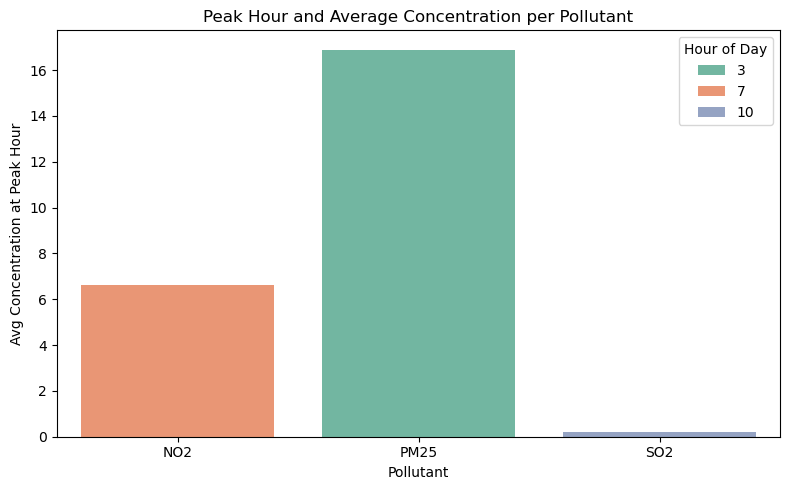

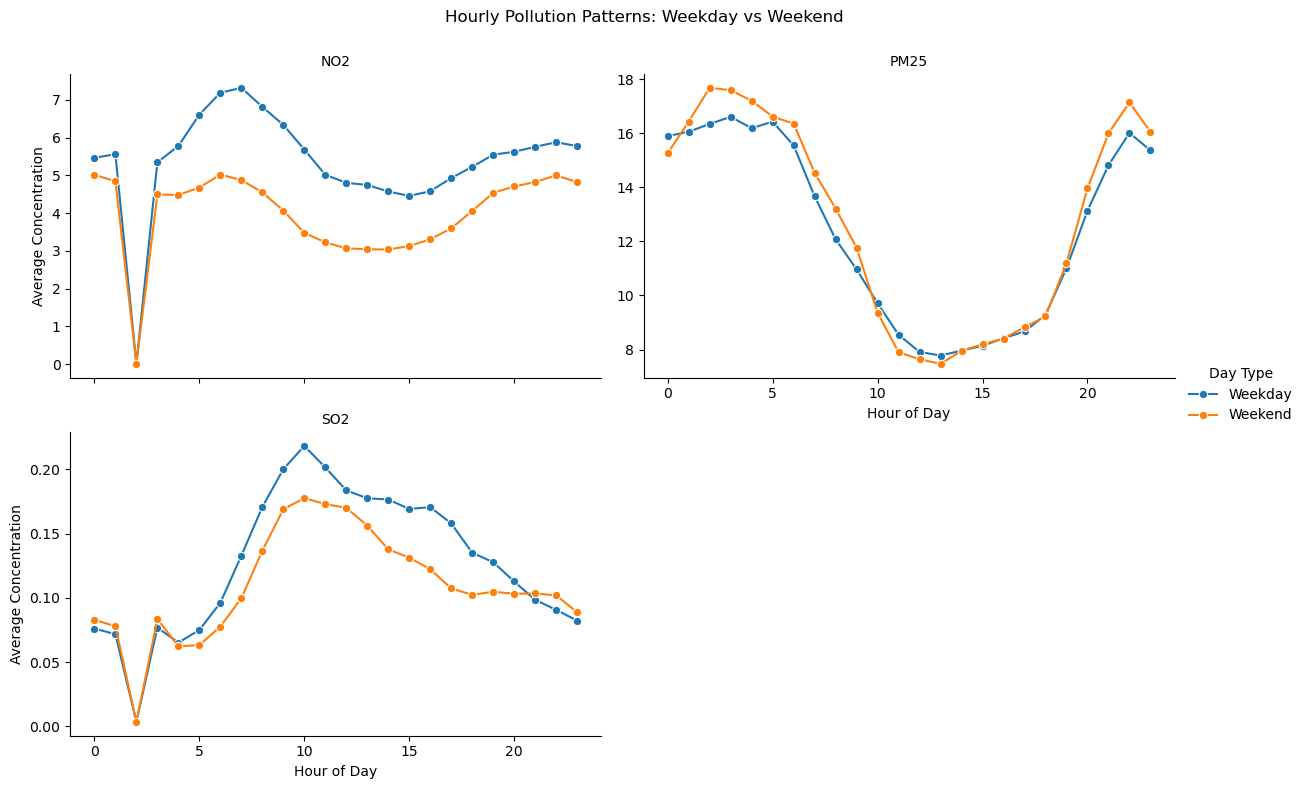

In [31]:
"""
Visualizes temporal pollution patterns by pollutant type using bar and line plots.

   - Displays the peak hour (hour of day) and corresponding average concentration for each pollutant.
   - Bar heights represent the highest average value observed across the 24-hour day for each pollutant.
   - Color-coded by hour of the day to highlight when pollution is most severe.

   - Shows hourly pollution trends separately for each pollutant using a FacetGrid layout.
   - Compares weekday and weekend patterns to identify differences in pollution behavior over the day.
   - Each subplot illustrates how concentrations vary by hour, helping identify traffic-related or activity-based fluctuations.

"""


plt.figure(figsize=(8, 5))
sns.barplot(data=peak_hours_by_pollutant, x='parameter', y='report_value', hue='hour', palette='Set2')
plt.title('Peak Hour and Average Concentration per Pollutant')
plt.xlabel('Pollutant')
plt.ylabel('Avg Concentration at Peak Hour')
plt.legend(title='Hour of Day')
plt.tight_layout()
plt.show()

g = sns.FacetGrid(hourly_by_daytype, col="parameter", hue="day_type", col_wrap=2, height=4, aspect=1.5, sharey=False)
g.map(sns.lineplot, "hour", "report_value", marker="o")
g.add_legend(title="Day Type")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Hour of Day", "Average Concentration")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Hourly Pollution Patterns: Weekday vs Weekend")
plt.show()


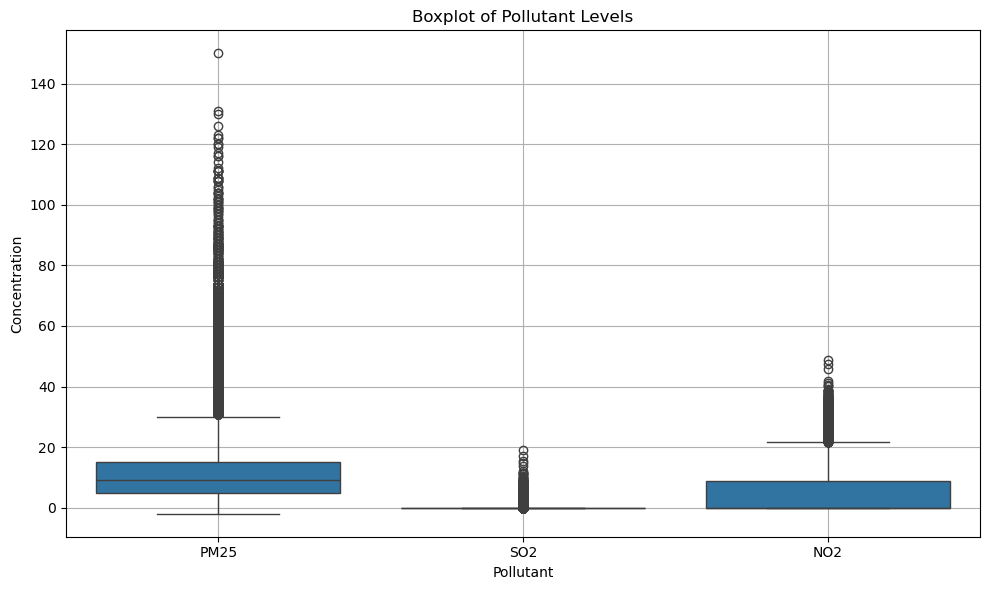

In [7]:
"""
Creates a boxplot to visualize the distribution of pollutant concentrations.

- To analyze the spread, central tendency, and presence of outliers in pollutant levels (PM2.5, O3, NO2, SO2).
- Boxplots provide insights into the variability and skewness of pollutant distributions.

- X-axis: Pollutant type.
- Y-axis: Measured concentration (report_value).
- Each box shows the interquartile range (IQR), median, and outliers for the corresponding pollutant.

"""


plt.figure(figsize=(10, 6))
sns.boxplot(x='parameter', y='report_value', data=df_pollutants)
plt.title('Boxplot of Pollutant Levels')
plt.ylabel('Concentration')
plt.xlabel('Pollutant')
plt.grid(True)
plt.tight_layout()
plt.show()


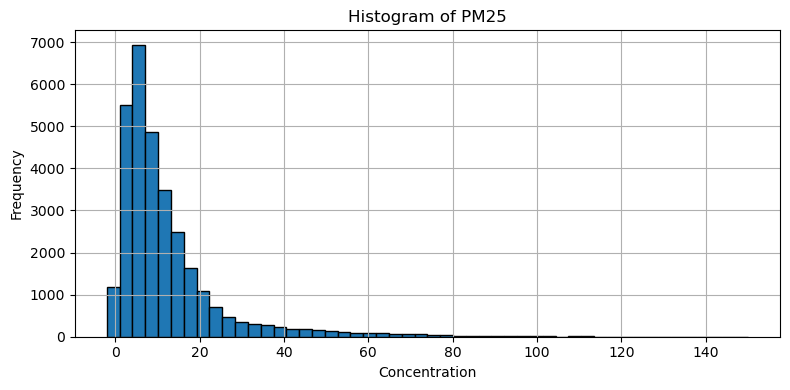

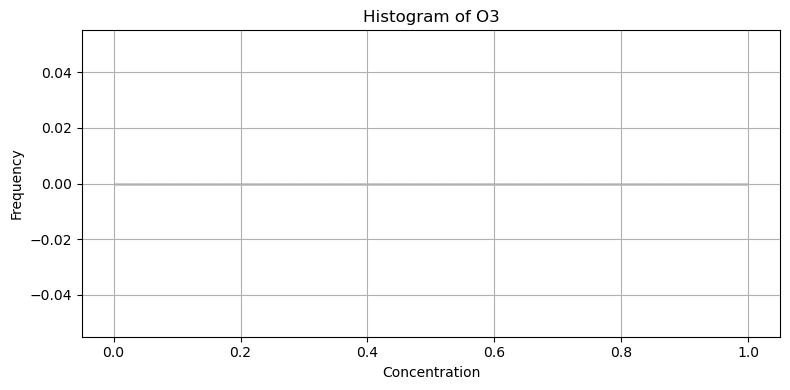

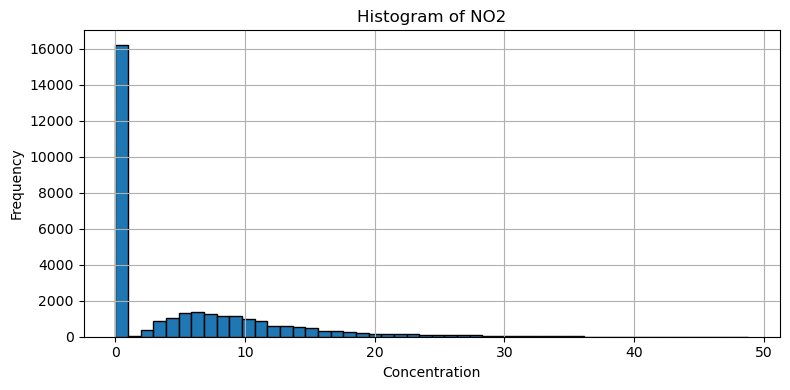

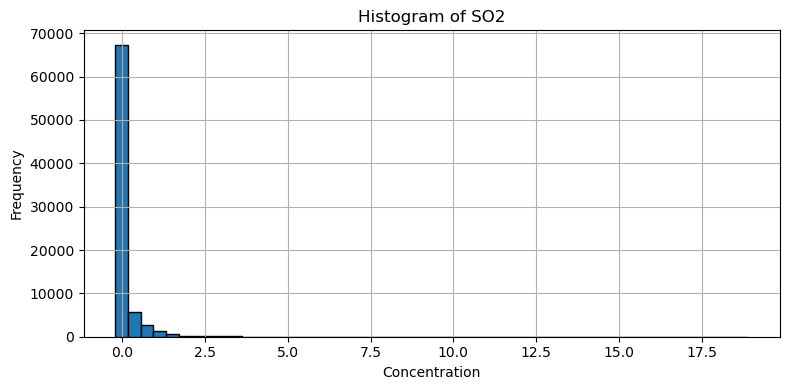

In [9]:
"""
Generates individual histograms for each key air pollutant to visualize the distribution of concentration values.

- To examine the frequency distribution of pollutant concentration values.
- Histograms help identify patterns such as skewness, modality, and the presence of extreme values for each pollutant.

- Iterates over a predefined list of pollutants: PM2.5, O3, NO2, and SO2.
- Filters the dataset for each pollutant.
- Plots a histogram of concentration values (`report_value`) using 50 bins for each pollutant.
- Adds titles, axis labels, grid lines, and formatting for clarity.

"""


pollutants = ['PM25', 'O3', 'NO2', 'SO2']
for pol in pollutants:
    subset = df_pollutants[df_pollutants['parameter'] == pol]
    plt.figure(figsize=(8, 4))
    plt.hist(subset['report_value'], bins=50, edgecolor='black')
    plt.title(f'Histogram of {pol}')
    plt.xlabel('Concentration')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


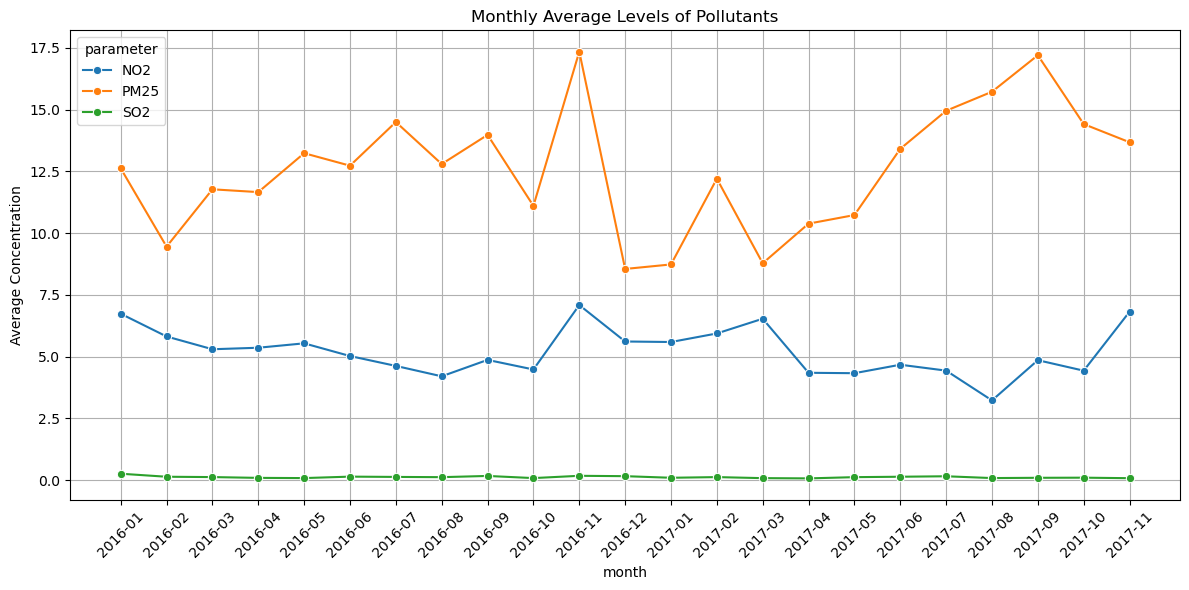

In [11]:
"""
Analyzes and visualizes monthly average concentrations of major air pollutants.

- Groups data by month and pollutant type to calculate average monthly pollutant levels.
- Converts the 'month' column from Period to string to enable proper axis labeling in the plot.
- Plots a multi-line chart showing trends in pollutant concentrations over the months of the year.

- X-axis: Month (January to December).
- Y-axis: Average concentration (`report_value`).
- Each line represents a different pollutant (PM2.5, O3, NO2, SO2), with markers for clarity.
- Enables grid and rotation of x-ticks for better readability.

- Helps identify seasonal patterns in pollution levels.
- Useful for detecting rising or falling trends across the year for each pollutant.

"""


monthly_avg = df_pollutants.groupby(['month', 'parameter'])['report_value'].mean().reset_index()
monthly_avg['month'] = monthly_avg['month'].astype(str)  # Convert Period to string for plotting

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='month', y='report_value', hue='parameter', marker="o")
plt.title('Monthly Average Levels of Pollutants')
plt.xticks(rotation=45)
plt.ylabel('Average Concentration')
plt.grid(True)
plt.tight_layout()
plt.show()


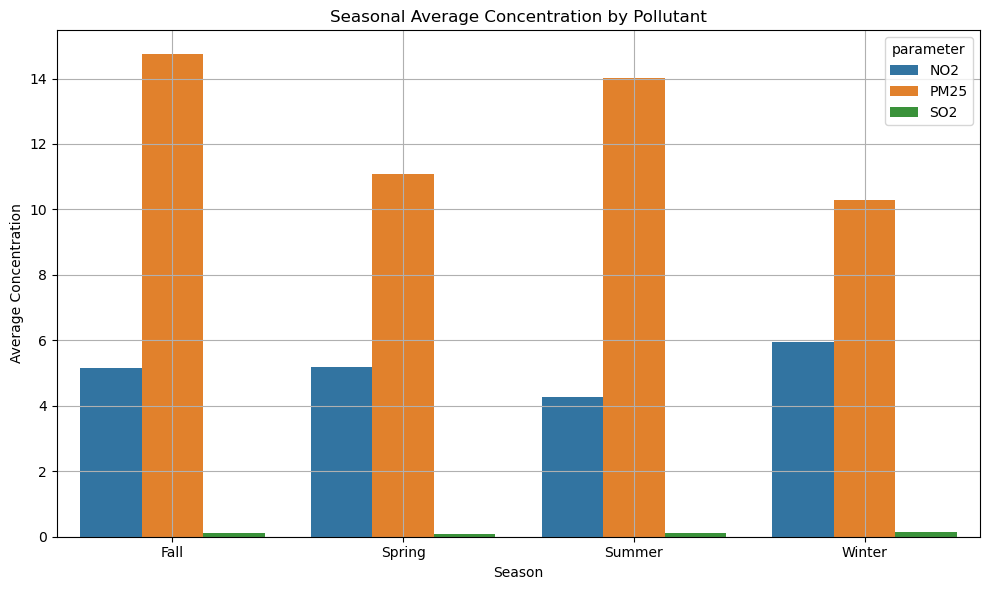

In [13]:
"""
Visualizes the seasonal variation in average pollutant concentrations.

- Groups the air quality dataset by season and pollutant type.
- Calculates the mean concentration (`report_value`) for each pollutant in each season.
- Creates a grouped bar chart comparing seasonal average levels across pollutants.

- X-axis: Season (Winter, Spring, Summer, Fall).
- Y-axis: Average concentration of pollutants.
- Each group of bars represents a season, with colors distinguishing different pollutants.
- Plot is formatted with title, grid, axis labels, and tight layout for clarity.

- Identifies how pollutant levels change across seasons.
- Useful for assessing environmental and meteorological influences on air quality.


"""


seasonal_avg = df_pollutants.groupby(['season', 'parameter'])['report_value'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_avg, x='season', y='report_value', hue='parameter')
plt.title('Seasonal Average Concentration by Pollutant')
plt.ylabel('Average Concentration')
plt.xlabel('Season')
plt.tight_layout()
plt.grid(True)
plt.show()


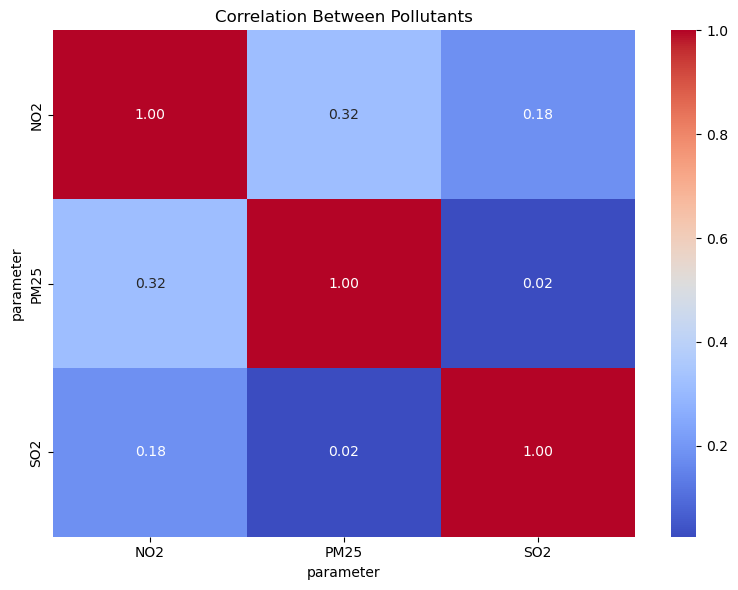

In [15]:
"""
Computes and visualizes the correlation between different air pollutants using a heatmap.

- Creates a pivot table with timestamps as rows and pollutant types as columns, with corresponding concentration values.
- Drops any rows containing missing values to ensure valid correlation computation.
- Calculates pairwise Pearson correlation coefficients between pollutants.
- Plots a heatmap of the correlation matrix with annotations and a diverging colormap.

- Each cell in the heatmap shows the correlation coefficient (ranging from -1 to 1) between two pollutants.
- Color scale (coolwarm) helps interpret positive and negative correlations visually.
- Annotated values (formatted to two decimal places) aid precise analysis.

- Identifies how strongly pollutant levels are related to each other over time.
- Helps detect potential shared sources or atmospheric behavior patterns among pollutants.

"""


pivot_df = df_pollutants.pivot_table(index='datetime_est', columns='parameter', values='report_value')

pivot_df = pivot_df.dropna(axis=0, how='any')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Between Pollutants')
plt.tight_layout()
plt.show()


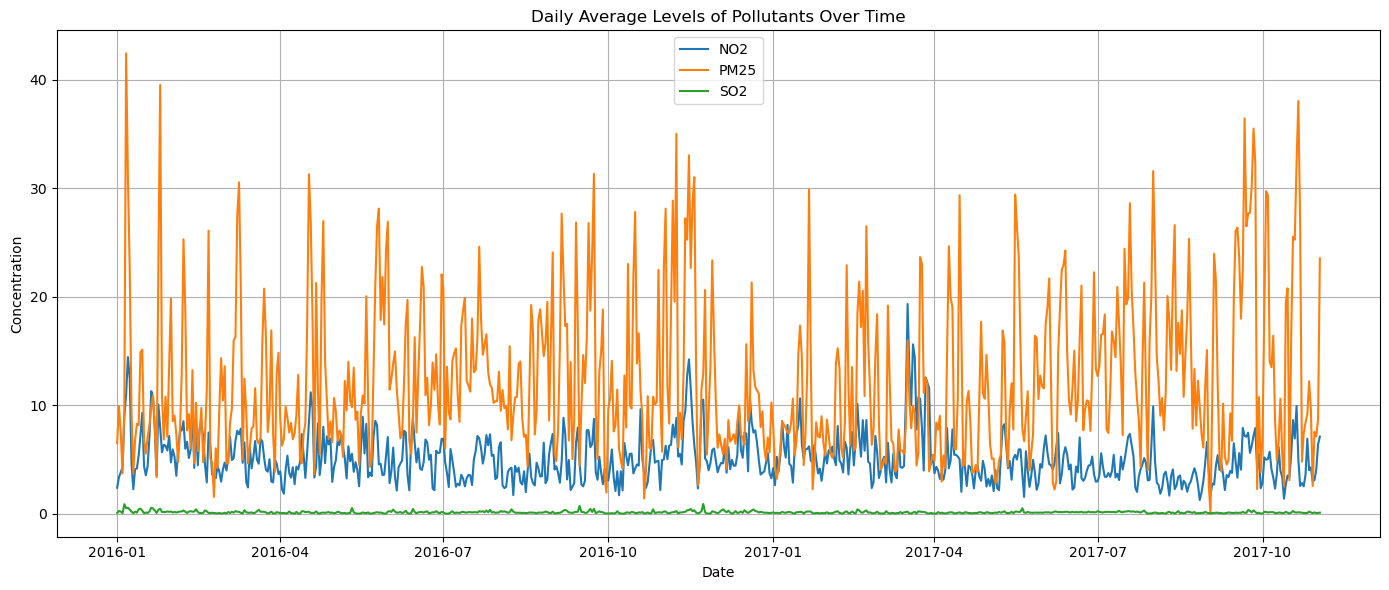

In [19]:
"""
Analyzes and visualizes the daily average concentrations of pollutants over time.

- Creates a pivot table with timestamps as rows and pollutant types as columns, using concentration values.
- Resamples the data to daily frequency and calculates the mean pollutant levels for each day.
- Plots time-series line graphs for each pollutant to show how daily averages evolve throughout the year.

- X-axis: Date (resampled to daily resolution).
- Y-axis: Average concentration of each pollutant.
- Each pollutant is represented by a separate line in the plot.
- Includes grid lines, legend, and formatting for clarity.

- Reveals long-term trends and fluctuations in air quality on a daily basis.
- Useful for identifying seasonal transitions, pollution spikes, or declines.

"""


pivot_daily = df_pollutants.pivot_table(index='datetime_est', columns='parameter', values='report_value')
daily_avg = pivot_daily.resample('D').mean()

plt.figure(figsize=(14, 6))
for col in daily_avg.columns:
    plt.plot(daily_avg.index, daily_avg[col], label=col)
plt.legend()
plt.title('Daily Average Levels of Pollutants Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.grid(True)
plt.tight_layout()
plt.show()


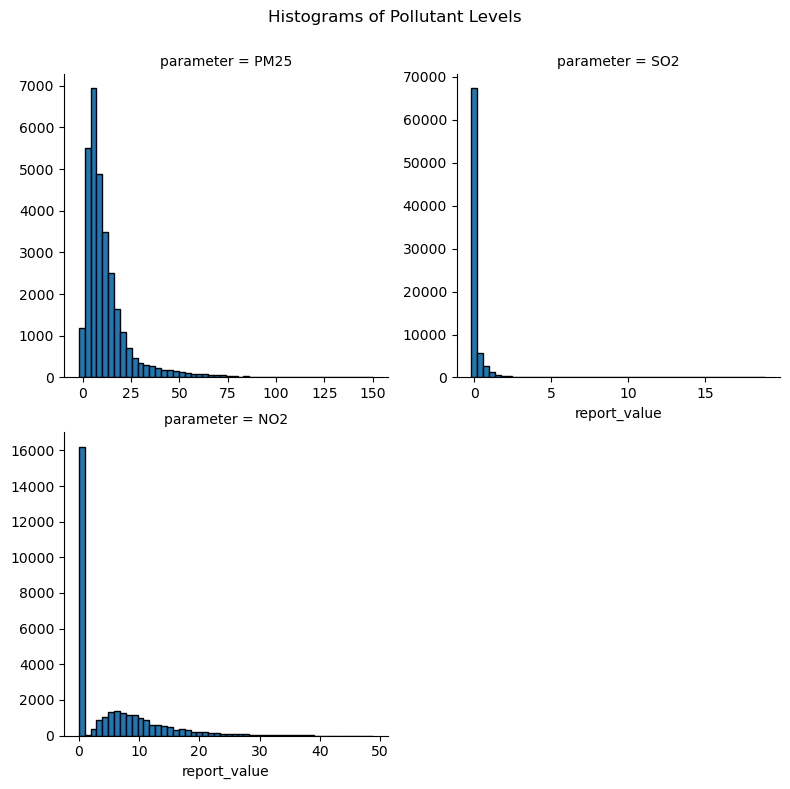

In [21]:
"""
Creates individual histograms for each pollutant using Seaborn's FacetGrid for side-by-side comparison.

- Utilizes Seaborn’s FacetGrid to create separate histogram plots for each pollutant (PM2.5, O3, NO2, SO2).
- Each subplot displays the distribution of concentration values for a specific pollutant.
- Uses consistent bin size and styling across plots for comparability.

- X-axis: Pollutant concentration (`report_value`).
- Y-axis: Frequency count.
- Edge-colored bins enhance visual clarity.
- Plots are arranged in a grid with two columns per row.

- Helps identify the distribution shape (e.g., normal, skewed) and presence of outliers for each pollutant.
- Useful for exploratory data analysis to assess data range, central tendency, and variability.

"""


g = sns.FacetGrid(df_pollutants, col="parameter", col_wrap=2, height=4, sharex=False, sharey=False)
g.map(plt.hist, "report_value", bins=50, edgecolor="black")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Histograms of Pollutant Levels')
plt.show()
